<a href="https://colab.research.google.com/github/Tjaarda1/ScalaExercises/blob/master/practica1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica 1: Clasificación de Imágenes usando modelos pre-entrenados

A continuación se presentará el código complementario con una breve explicación de la práctica 1, sobre el que se han tomado las imágenes y resultados para compartirlos en el documento compartido en la asignatura https://docs.google.com/document/d/1euIhO_ORce9BT0D1lf6MBk-9R6q9kTdiGesOPVZnIN4/edit?pli=1

## Imports

Se hacen todos los import (en su mayoría de la librería tensorflow)


In [63]:

from google.colab import files
import io
import numpy as np
import tensorflow as tf


from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications import xception, vgg16, nasnet, inception_v3
from tensorflow.keras.applications.xception import preprocess_input as preprocess_xception
from tensorflow.keras.applications.vgg16 import preprocess_input as preprocess_vgg16
from tensorflow.keras.applications.nasnet import preprocess_input as preprocess_nasnet
from tensorflow.keras.applications.inception_v3 import preprocess_input as preprocess_inception_v3
from tensorflow.keras.utils import plot_model



## Métodos auxiliares

Se definen los métodos auxiliares.

**load_and_preprocess_image(image_data, target_size, preprocess_fn)**: Dada una función de preprocesado dada de la librería tensorflow, datos de imagen y un tamaño específico, te devuelve la imágen preprocesada. Este método es usado para poder tener diferentes versiones de la misma imágen, cada una para un modelo diferente. Los tamaños empleados se sacan de la API dada por Tensorflow

**make_prediction_with_model(model, model_name, preprocessed_img, decode_predictions):**
Dado un modelo, una función de decodificar predicciones del modelo, y la imagen preprocesada; realiza una predicción

**plot_imageAndPrediction(model_name, image, predictions):** Muestra la predicción en conjunto con la imagen

In [83]:
# Function to load and preprocess an image for a specific model
def load_and_preprocess_image(image_data, target_size, preprocess_fn):
    img = image.load_img(image_data, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array_expanded = np.expand_dims(img_array, axis=0)
    return preprocess_fn(img_array_expanded)



# Function to make predictions with a given model
def make_prediction_with_model(model, model_name, preprocessed_img, decode_predictions):
    outputs = model.predict(preprocessed_img)
    predictions = decode_predictions(outputs, top=5)[0]
    plot_imageAndPrediction(model_name, img, predictions)

def plot_imageAndPrediction(model_name, image, predictions):
  #model_name: Nombre del modelo
  #image. Imagen a clasificar
  #predictons: Predicciones obtenidas por el modelo (5 clases
  #mayoritarias y la proba de pertenencia a cada una de esas clases)
  plt.imshow(image)
  title= model_name +'\n'
  for i in range(5):
    title=title + predictions[i][1] + " %0.2f" % (100*predictions[i][2])+'%\n'
  plt.xticks([])
  plt.yticks([])
  print(title)
  plt.title(title)
  return

## Análisis de los modelos

Subiendo una imagen, comparamos todos los modelos entre ellos, se eligen 4 que están en un diccionario. Se preprocesa la imagen acorde a los modelos preentrenados elegidos para luego sacar la predicción utilizando el modelo.

Saving GGCB5776.jpg to GGCB5776 (6).jpg
1/1 [==============================] - 1s 813ms/step
Xception
coffeepot 91.36%
espresso_maker 7.91%
stove 0.41%
water_jug 0.08%
teapot 0.03%

1/1 [==============================] - 0s 487ms/step
VGG16
coffeepot 36.53%
espresso_maker 33.05%
waffle_iron 12.94%
spatula 3.94%
measuring_cup 3.14%

1/1 [==============================] - 6s 6s/step
NASNet
coffeepot 76.65%
espresso_maker 7.85%
espresso 0.25%
stove 0.24%
teapot 0.14%

1/1 [==============================] - 1s 1s/step
InceptionV3
coffeepot 96.11%
espresso_maker 3.59%
espresso 0.01%
stove 0.01%
hook 0.01%



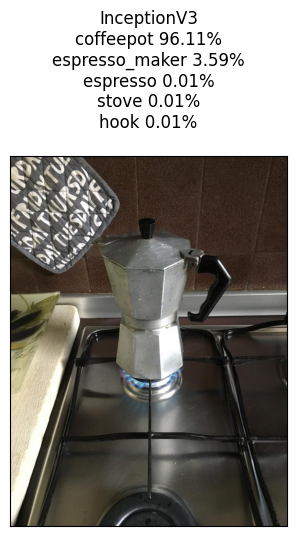

In [84]:
# Upload and read image
uploaded_files = files.upload()
file_name = next(iter(uploaded_files))
file_data = uploaded_files[file_name]
image_data = io.BytesIO(file_data)
img = image.load_img(image_data)


# Preprocess the image for each model and store in a dictionary.  Sizes taken from Teraflow api
img_preprocessed = {
    'Xception': load_and_preprocess_image(image_data, (299, 299), preprocess_xception),
    'VGG16': load_and_preprocess_image(image_data, (224, 224), preprocess_vgg16),
    'NASNet': load_and_preprocess_image(image_data, (331, 331), preprocess_nasnet),
    'InceptionV3': load_and_preprocess_image(image_data, (299, 299), preprocess_inception_v3),
}


# Model instances.
models = {
    'Xception': (xception.Xception(weights='imagenet'), xception.decode_predictions),
    'VGG16': (vgg16.VGG16(weights='imagenet'), vgg16.decode_predictions),
    'NASNet': (nasnet.NASNetLarge(weights='imagenet'), nasnet.decode_predictions),
    'InceptionV3': (inception_v3.InceptionV3(weights='imagenet'), inception_v3.decode_predictions),
}

# Iterate over each model and make predictions
for model_name, (model_instance, decode_fn) in models.items():
    make_prediction_with_model(model_instance, model_name, img_preprocessed[model_name], decode_fn)


In [85]:
img_preprocessed['VGG16']

array([[[[-28.939003, -36.779   , -42.68    ],
         [-35.939003, -43.779   , -49.68    ],
         [-35.939003, -43.779   , -49.68    ],
         ...,
         [-76.939   , -80.779   , -74.68    ],
         [-78.939   , -82.779   , -76.68    ],
         [-76.939   , -80.779   , -74.68    ]],

        [[-35.939003, -43.779   , -49.68    ],
         [-24.939003, -32.779   , -38.68    ],
         [-36.939003, -44.779   , -50.68    ],
         ...,
         [-75.939   , -79.779   , -73.68    ],
         [-75.939   , -79.779   , -73.68    ],
         [-77.939   , -81.779   , -75.68    ]],

        [[-44.939003, -52.779   , -58.68    ],
         [-28.939003, -36.779   , -42.68    ],
         [-27.939003, -35.779   , -41.68    ],
         ...,
         [-83.939   , -87.779   , -81.68    ],
         [-69.939   , -73.779   , -67.68    ],
         [-82.939   , -86.779   , -80.68    ]],

        ...,

        [[113.061   , 115.221   , 111.32    ],
         [ 64.061   ,  72.221   ,  67.32    ]

## Se visualiza el modelo

Descomentando el modelo que se quiera visualizar, se crea una imagen y un resumen de la arquitectura del modelo.

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_39 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

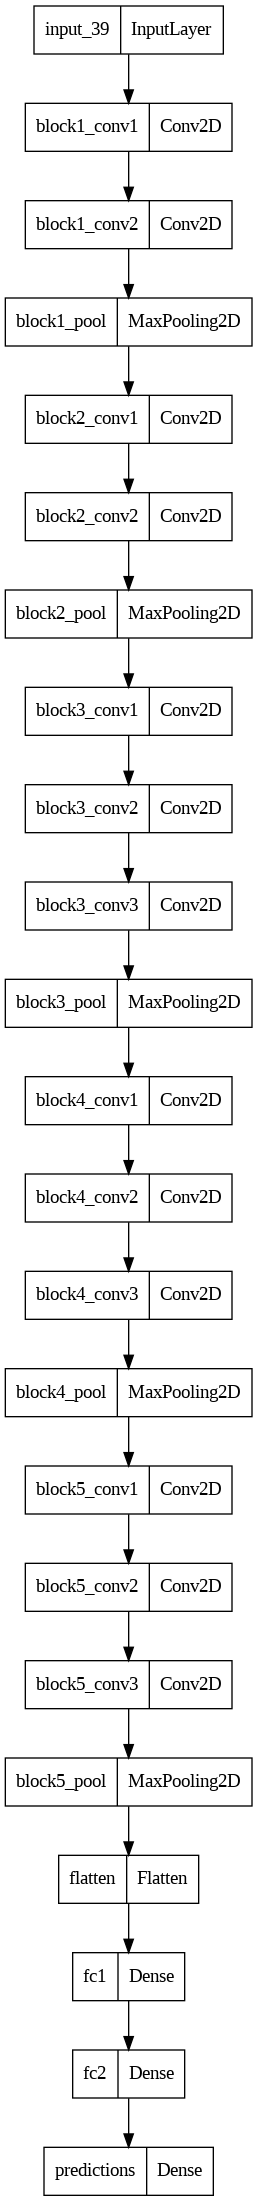

In [82]:
# model, _ = models['Xception']
model, _ = models['VGG16']
# model, _ = models['NASNet']
# model, _ = models['InceptionV3']

model.summary()
plot_model(model, to_file='model.png')

